## Multiple linear regression

### Data description and analysis

<b> The Boston Housing Dataset: </b> the Boston Housing Dataset is derived from information collected by the U.S. Census Service regarding housing in the Boston, Massachusetts area. It aims to predict house prices based on various characteristics. 

<div class="alert alert-block alert-danger">
    
1. Import the Boston Housing dataset.
2. Display the correlation matrix and select only the highly correlated features with the label (MEDV feature) using a threshold value of 0.6.
3. Verify if the selected features represent a linear relationship with the target variable based on a 3D plot.
4. Split the generated dataset.
5. Normalize the data (excluding the label) using the min max scaler strategy.


<div/>

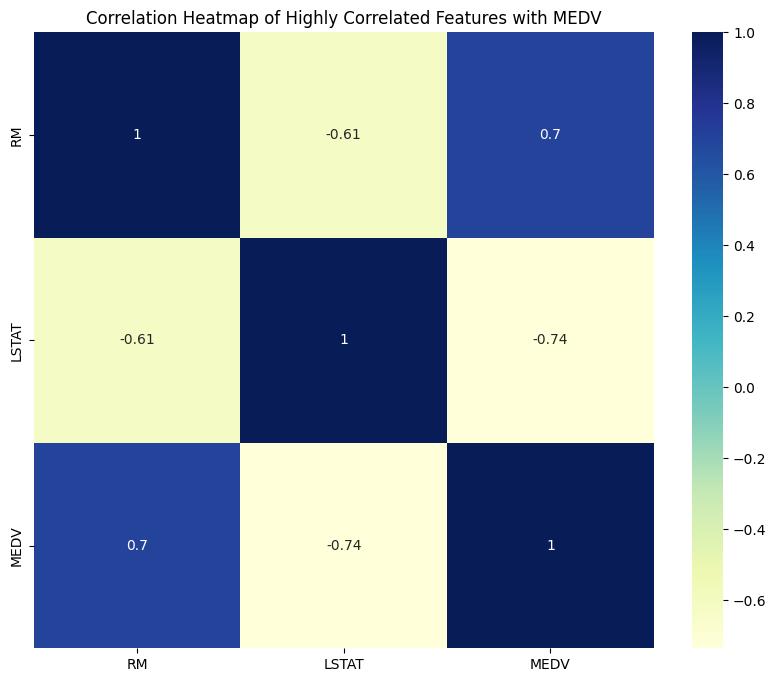

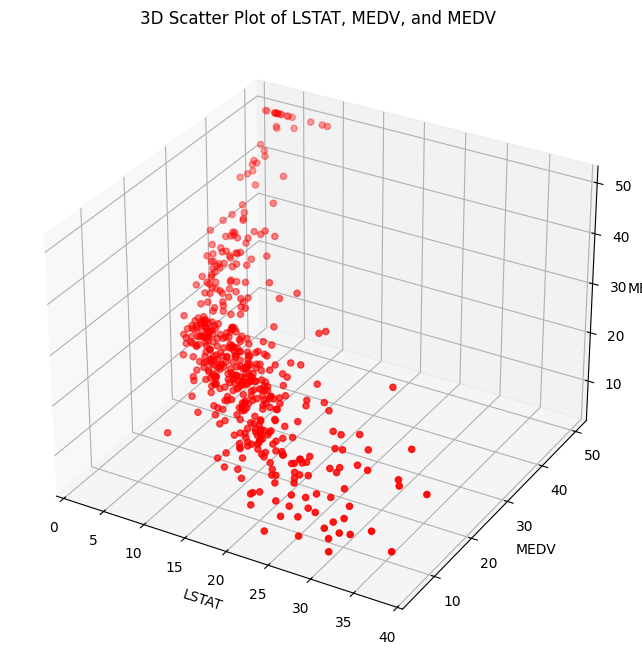

Data normalization complete.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


boston_df = pd.read_csv(r'C:\Users\Pc\Desktop\ML TPs\tp3v2\HousingData.csv')



correlation_matrix = boston_df.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix['MEDV']) > 0.6]
high_corr_data = boston_df[high_corr_features]



plt.figure(figsize=(10, 8))
sns.heatmap(boston_df[high_corr_features].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap of Highly Correlated Features with MEDV")
plt.show()


if len(high_corr_features) > 2: 
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(high_corr_data[high_corr_features[1]], high_corr_data[high_corr_features[2]], high_corr_data['MEDV'], c='r', marker='o')
    ax.set_xlabel(high_corr_features[1])
    ax.set_ylabel(high_corr_features[2])
    ax.set_zlabel('MEDV')
    plt.title(f'3D Scatter Plot of {high_corr_features[1]}, {high_corr_features[2]}, and MEDV')
    plt.show()
else:
    print("Not enough features to create a 3D plot.")


X = high_corr_data.drop(['MEDV'], axis=1)
y = high_corr_data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data normalization complete.")


### Data training and evaluation

<div class="alert alert-block alert-danger">
    
1. Use the following lines of code to perform training on the Boston Housing dataset.

<div/>

In [2]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(learning_rate='invscaling', eta0=0.0001,max_iter=1000,verbose=1)

<div class="alert alert-block alert-danger">

2. Display the convergence graph of the trained model (where x represents the iterations and y is the loss).
3. Vary the learning rate value (0.01, 0.001, 0.0001). By comparing the convergence graphs for each model, what do you observe in terms of convergence and results?
4. Why does the graph not reach the maximum number of iterations when
using the 0.01 learning rate? Which variable controls this behavior?
5. Display the performance of the generated models on the test set based on the following metrics: MAE, MSE, RMSE, and R-squared. Select the best model based on these metrics.
6. Plot the generated plane of the best model and the scaled training data in one 3D plot. What do you observe?
7. Predict the class of the sample shown in the following figure based on the best model.    

<div/>

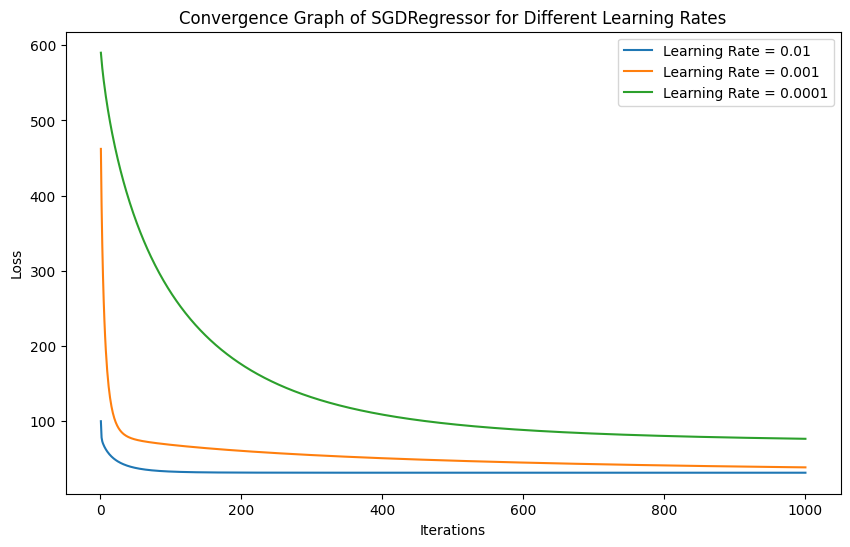

Performance Metrics for Different Learning Rates
Learning Rate: 0.01
MAE: 3.8817, MSE: 31.3785, RMSE: 5.6016, R2: 0.5721

Learning Rate: 0.001
MAE: 4.0159, MSE: 34.7681, RMSE: 5.8964, R2: 0.5259

Learning Rate: 0.0001
MAE: 5.6159, MSE: 65.9047, RMSE: 8.1182, R2: 0.1013

The best model is with learning rate 0.01 based on R2 score.


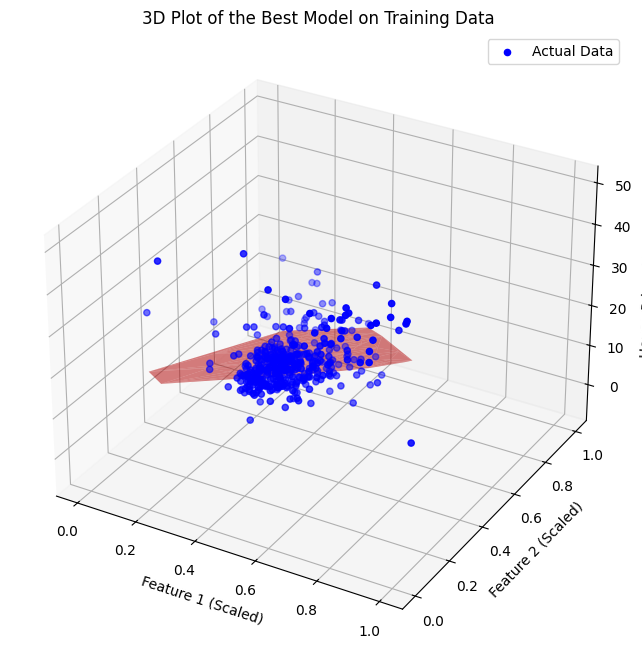

Predicted value for the given sample: [24.99191708]


In [3]:
# Import necessary libraries
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


learning_rates = [0.01, 0.001, 0.0001]
results = {}


imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)


for lr in learning_rates:
    sgdr = SGDRegressor(learning_rate='invscaling', eta0=lr, max_iter=1, tol=None, warm_start=True)
    losses = []
    
    for i in range(1000):  # 1000 iterations
        sgdr.partial_fit(X_train_scaled, y_train)
        # Predict and calculate loss
        y_train_pred = sgdr.predict(X_train_scaled)
        loss = mean_squared_error(y_train, y_train_pred)
        losses.append(loss)
        
    
    results[lr] = {
        'iterations': range(1, len(losses) + 1),
        'loss': losses,
        'model': sgdr
    }


plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(results[lr]['iterations'], results[lr]['loss'], label=f'Learning Rate = {lr}')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Convergence Graph of SGDRegressor for Different Learning Rates')
plt.legend()
plt.show()


metrics = {}
for lr, res in results.items():
    y_pred = res['model'].predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    metrics[lr] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}


print("Performance Metrics for Different Learning Rates")
for lr in learning_rates:
    print(f"Learning Rate: {lr}")
    print(f"MAE: {metrics[lr]['MAE']:.4f}, MSE: {metrics[lr]['MSE']:.4f}, RMSE: {metrics[lr]['RMSE']:.4f}, R2: {metrics[lr]['R2']:.4f}\n")


best_lr = max(metrics, key=lambda k: metrics[k]['R2'])
best_model = results[best_lr]['model']
print(f"The best model is with learning rate {best_lr} based on R2 score.")


feature1, feature2 = X_train_scaled[:, 0], X_train_scaled[:, 1]
predicted_y = best_model.predict(X_train_scaled)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature1, feature2, y_train, color='b', label='Actual Data')
ax.plot_trisurf(feature1, feature2, predicted_y, color='red', alpha=0.5)
ax.set_xlabel('Feature 1 (Scaled)')
ax.set_ylabel('Feature 2 (Scaled)')
ax.set_zlabel('House Price (MEDV)')
plt.title('3D Plot of the Best Model on Training Data')
plt.legend()
plt.show()


sample = np.array([[0.5, 0.2]])  # Modify these values based on your dataset
sample = imputer.transform(sample)  # Impute if the sample contains missing values
sample_prediction = best_model.predict(sample)
print("Predicted value for the given sample:", sample_prediction)


![title](sample.png)